In [1]:
import os 
import zipfile

local_zip = './tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./tmp/validation-horse-or-human')
zip_ref.close()

In [2]:
train_horse_dir = os.path.join('./tmp/horse-or-human/horses')
train_human_dir = os.path.join('./tmp/horse-or-human/humans')
val_horse_dir = os.path.join('./tmp/validation-horse-or-human/horses')
val_human_dir = os.path.join('./tmp/validation-horse-or-human/humans')

In [6]:
# To see how the file names look like

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
val_horse_names = os.listdir(val_horse_dir)
val_human_names = os.listdir(val_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])
print(val_horse_names[:10])
print(val_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

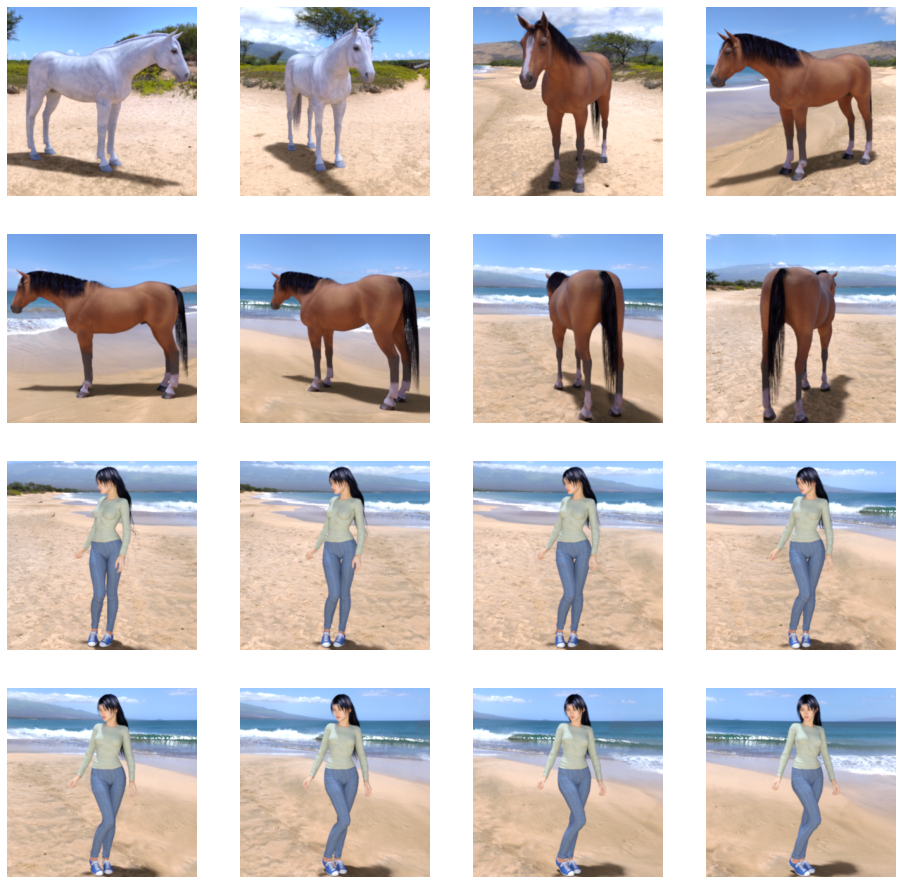

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8: pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8: pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [14]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        3

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('./tmp/horse-or-human/', 
                                                    target_size=(300,300), 
                                                    batch_size=128, 
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('./tmp/validation-horse-or-human/',
                                                             target_size=(300,300),
                                                             batch_size=128,
                                                             class_mode='binary'
                                                             )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [32]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=15,
                   validation_data = validation_generator,
                   validation_steps=8)

Epoch 1/15
8/8 [==============================] - 44s 5s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.4895 - val_accuracy: 0.7891
Epoch 2/15
8/8 [==============================] - 43s 5s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 41s 5s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 43s 6s/step - loss: 3.7555e-04 - accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 40s 5s/step - loss: 0.6661 - accuracy: 0.8910
Epoch 6/15
8/8 [==============================] - 39s 5s/step - loss: 0.0956 - accuracy: 0.9789
Epoch 7/15
8/8 [==============================] - 38s 5s/step - loss: 0.0509 - accuracy: 0.9789
Epoch 8/15
8/8 [==============================] - 43s 5s/step - loss: 0.0188 - accuracy: 0.9941
Epoch 9/15
8/8 [==============================] - 39s 5s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 44s 5s/step - loss: 0.0015 - accuracy: 

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

path = './tmp/test/'
test_path = os.path.join(path)
test_images = os.listdir(test_path)

for imag in test_images:
    file_path = path+imag
    
    img = image.load_img(file_path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(imag+"is a human")
    else:
        print(imag+"is a horse")

[1.]
image1.jpgis a human
[0.]
image2.jpgis a horse
[0.]
image3.jpgis a horse
[0.]
image4.jpgis a horse
[1.]
image5.jpgis a human
[0.]
image6.jpgis a horse


<ipython-input-30-294598472502>:35: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


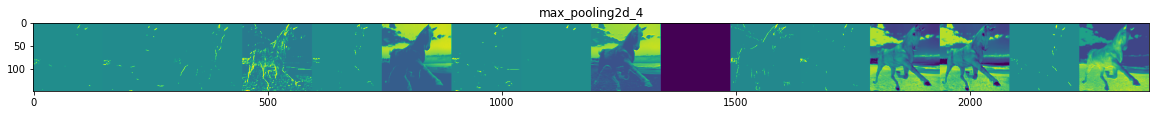

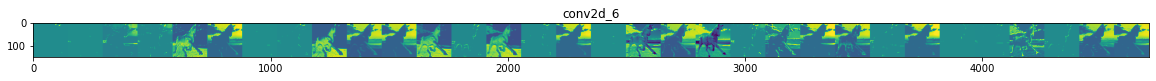

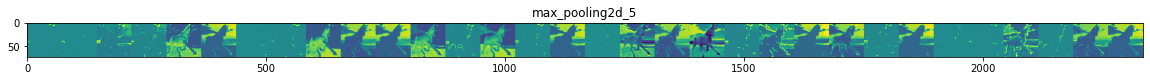

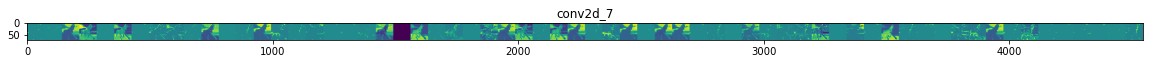

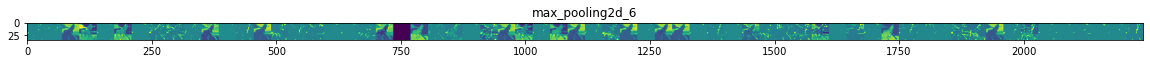

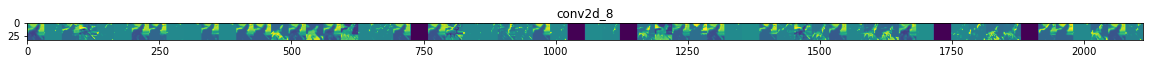

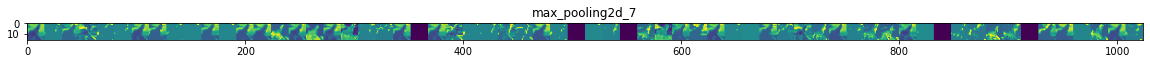

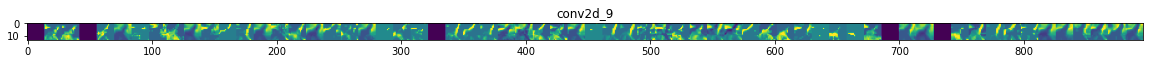

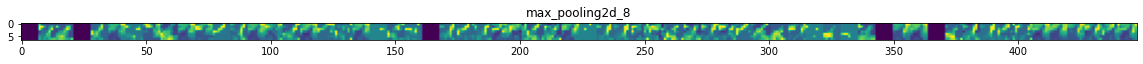

In [30]:
# Visualizing the intermediate representations

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_image_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_image_files = [os.path.join(train_human_dir, f) for f in train_horse_names]
img_path = random.choice(horse_image_files+human_image_files)

img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

x/=255


successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            
            display_grid[:, i*size : (i+1)*size] = x
        scale = 20./n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')